# Stock Price Prediction and Sentimental Analysis


### Author : Aditya Prabaswara Mardjikoen

### The Sparks Foundation Internship (April 2021) Task 7 - Stock Market Prediction using Numerical and Textual Analysis

In this task, I will create a hybrid analysis for analyzing stock price or performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

### Import Python Library and Data

First we will import the required Python library and display the data in the dataset.

In [44]:
# Import Python library
import pandas_datareader as dr
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [45]:
# Import data
df=dr.data.get_data_yahoo('TATASTEEL.NS',start='2016-04-17',end='2021-04-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-18,321.310425,312.164154,316.213287,319.690765,7549816.0,286.675140
2016-04-20,342.318268,321.739166,321.977356,340.555725,19294099.0,305.385284
2016-04-21,346.843781,336.411316,341.841919,337.792786,10864121.0,302.907715
2016-04-22,346.557953,335.649109,341.079712,336.935303,12695922.0,302.138794
2016-04-25,336.982941,328.265411,335.839661,331.028351,6465189.0,296.841888
...,...,...,...,...,...,...
2021-04-09,930.000000,885.700012,921.000000,899.500000,32179069.0,899.500000
2021-04-12,893.200012,843.349976,876.549988,851.549988,22135504.0,851.549988
2021-04-13,881.599976,849.000000,862.000000,879.000000,20428502.0,879.000000


In [46]:
# Display data shape
print('Rows: {}'.format(df.shape[0]))
print('Columns: {}'.format(df.shape[1]))

Rows: 1233
Columns: 6


We can see that the stock price data has 1233 rows and 6 columns.

In [47]:
# Display the first five row in the dataset
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-18,321.310425,312.164154,316.213287,319.690765,7549816.0,286.675140
2016-04-20,342.318268,321.739166,321.977356,340.555725,19294099.0,305.385284
2016-04-21,346.843781,336.411316,341.841919,337.792786,10864121.0,302.907715
2016-04-22,346.557953,335.649109,341.079712,336.935303,12695922.0,302.138794
2016-04-25,336.982941,328.265411,335.839661,331.028351,6465189.0,296.841888


In [48]:
# Display the last five row in the dataset
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-09,930.000000,885.700012,921.000000,899.500000,32179069.0,899.500000
2021-04-12,893.200012,843.349976,876.549988,851.549988,22135504.0,851.549988
2021-04-13,881.599976,849.000000,862.000000,879.000000,20428502.0,879.000000
2021-04-15,911.500000,879.500000,892.000000,898.200012,21856357.0,898.200012
2021-04-16,914.400024,886.250000,903.799988,890.250000,17398598.0,890.250000


Next we will check the data type, the descriptive statistics, and the null values in the dataset.

In [49]:
# Display data type
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1233 entries, 2016-04-18 to 2021-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1233 non-null   float64
 1   Low        1233 non-null   float64
 2   Open       1233 non-null   float64
 3   Close      1233 non-null   float64
 4   Volume     1233 non-null   float64
 5   Adj Close  1233 non-null   float64
dtypes: float64(6)
memory usage: 67.4 KB


In [50]:
# Check for null value
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

We can see that there is no null values in the stocks prize data. Now let see the trend of the close price in the stocks.

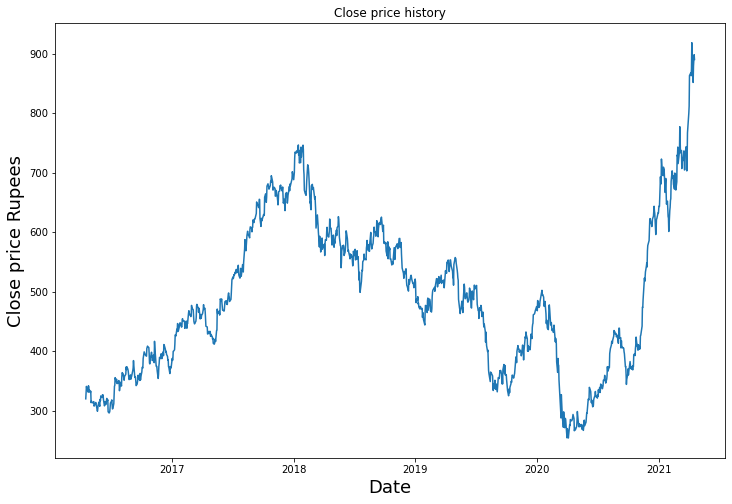

In [51]:
# Plot close price history
plt.figure(figsize=(12,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price Rupees',fontsize=18)
plt.show()

### Stock Price Predictions

In this section, I will give a procedure to predict stock price using LSTM. Before I create my prediction analysis, I will see the amount of data before and after splitting 70% of it.

In [52]:
# Before splitting
import math
data=df.filter(['Close'])
df_1=data.values
len(df_1)

1233

In [53]:
# After splitting
train_size=math.ceil(len(df_1)*.7)
train_size

864

Now lets transform our data by using min-max scaling.

In [54]:
# Transform the stock price data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(df_1)
scaled

array([[0.09921126],
       [0.13060366],
       [0.12644668],
       ...,
       [0.94072065],
       [0.96960805],
       [0.95764685]])

Then, we split our data into training data and test data.

In [55]:
# Training data creation
train_data=scaled[0:train_size,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

    if i<=61:
        print(x_train)
        print(y_train)

[array([0.09921126, 0.13060366, 0.12644668, 0.12515655, 0.11626924,
       0.13225211, 0.12960023, 0.11648426, 0.12150128, 0.1155525 ,
       0.11834773, 0.08946386, 0.09383587, 0.09025227, 0.08939219,
       0.08846048, 0.09096901, 0.09211574, 0.0807199 , 0.08609529,
       0.0871704 , 0.0898939 , 0.08588027, 0.0807199 , 0.06767556,
       0.07362434, 0.08351508, 0.08437517, 0.09068232, 0.08028986,
       0.09749114, 0.09433758, 0.10652184, 0.10351159, 0.1025082 ,
       0.10931702, 0.10774025, 0.10852866, 0.09756281, 0.08136492,
       0.0840168 , 0.09161403, 0.0919724 , 0.08473353, 0.10021469,
       0.09706114, 0.09476763, 0.09691779, 0.06638548, 0.0633036 ,
       0.06473703, 0.06774723, 0.07971647, 0.08853215, 0.0930475 ,
       0.09648775, 0.07362434, 0.0745561 , 0.08695537, 0.10888703])]
[0.13103365533398487]
[array([0.09921126, 0.13060366, 0.12644668, 0.12515655, 0.11626924,
       0.13225211, 0.12960023, 0.11648426, 0.12150128, 0.1155525 ,
       0.11834773, 0.08946386, 0.093

In [56]:
# Reshape the training data using numpy
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(804, 60, 1)

In Python, LSTM algorithm required keras library and we will used sequential model. Additionally, we use mean squared error to evaluate our model and adam optimizer to optimize our close price predictions.

In [57]:
# Import functions from keras
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [58]:
# Build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [59]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [60]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

804/804 [==============================] - 28s 35ms/step - loss: 0.0028


In [61]:
# Test data creation
test_data=scaled[train_size-60:,:]
x_test=[]
y_test=df_1[train_size:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [62]:
# Set the test independent variable data
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [63]:
# Predict the close price data
prediction=model.predict(x_test)
prediction=scaler.inverse_transform(prediction)

Lastly, we will plot the predicted vs actual value in a line plot to see how accurate our predictions.

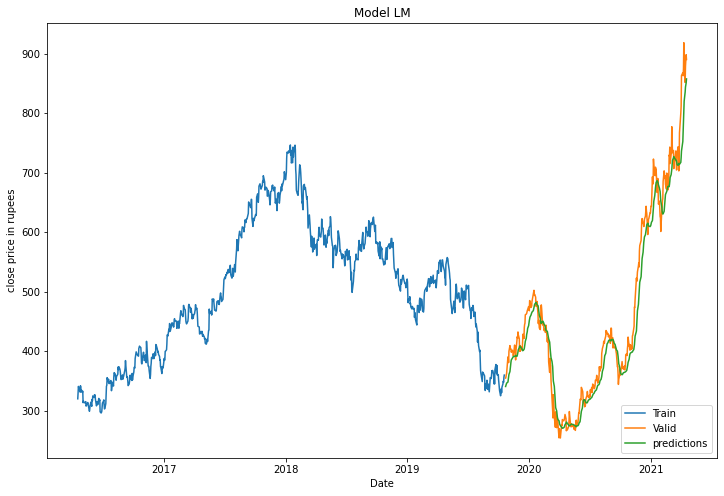

In [64]:
# Plot actuval vs predicted value
train=data[:train_size]
valid=data[train_size:]
valid['predictions']=prediction
plt.figure(figsize=(12,8))
plt.title('Model LM')
plt.xlabel('Date')
plt.ylabel('close price in rupees')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Valid','predictions'],loc='lower right')
plt.show()

From the plot above, we can see that our predictions approach its actual value. This code below will display the value of close price predictions versus its actual value.

In [65]:
# Display predicted and actual value
valid

,Close,predictions
Date,,
2019-10-22,354.500000,340.397644
2019-10-23,356.200012,342.327362
2019-10-24,359.899994,344.120392
2019-10-25,362.250000,345.974823
2019-10-29,390.200012,347.893677
...,...,...
2021-04-09,899.500000,819.983032
2021-04-12,851.549988,835.327454
2021-04-13,879.000000,843.913513


# Sentiment Analysis

In this section, I will analyze the headline news data by using Natural Language Preprocessing (NLP). First I will display the headlines data.

In [66]:
# Display the first five row in the headlines data
raw=pd.read_csv('india-news-headlines.csv')
raw.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [67]:
# Display the last five row in the headlines data
raw.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [68]:
# Copy the headline text column into a new data frame and display it
raw_df=raw[['headline_text']].copy()
raw_df

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic
...,...
3424062,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,Govt extends deadline for use of FASTag till F...


In [69]:
# Display the first five row in the headline column
raw_df.head()

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic


Next, we will check does the headline column contains a missing value.

In [70]:
# Check for missing value
raw_df.isnull().sum()

headline_text    0
dtype: int64

We can see that headline text columns does not contains any missing value.

In [71]:
# Display the first five rows in the headline columns
raw_df=raw_df.iloc[:15000,:]
raw_df.head()

,headline_text
0,Status quo will not be disturbed at Ayodhya; s...
1,Fissures in Hurriyat over Pak visit
2,America's unwanted heading for India?
3,For bigwigs; it is destination Goa
4,Extra buses to clear tourist traffic


In [90]:
# Display the shape of the headline column
# Display data shape
print('Rows: {}'.format(raw_df.shape[0]))
print('Columns: {}'.format(raw_df.shape[1]))

Rows: 15000
Columns: 1


After observing the headline news data, I will import the natural language library in Python.

In [73]:
# Import NLP library
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [74]:
# Import vader lexicon and stopwords
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Lets add the necessary score in sentimental analysis to evaluate the headline.

In [75]:
# Evaluate the headline category into three types of tendency value: positive, neutral, and negative
sid=SentimentIntensityAnalyzer()
result=[]
for line in raw_df['headline_text']:
    scores=sid.polarity_scores(line)
    scores['headline']=line
    result.append(scores)
rev=pd.DataFrame(result)
rev.head()

,neg,neu,pos,compound,headline
0,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...
1,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit
2,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?
3,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa
4,0.000,0.658,0.342,0.3818,Extra buses to clear tourist traffic


In [89]:
# Display the shape of the new data frame
# Display data shape
print('Rows: {}'.format(rev.shape[0]))
print('Columns: {}'.format(rev.shape[1]))

Rows: 15000
Columns: 6


In sentimental analysis, we will add a sentiment score to evaluate the headline data.

In [77]:
# Add ratings score
ratings=[]
for row in rev['compound']:
    if row >= 0.05 :
        ratings.append(1)
    elif row <= - 0.05 :
        ratings.append(-1)
    else :
        ratings.append(0)

rev['scores']=ratings
rev.head()

,neg,neu,pos,compound,headline,scores
0,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...,1
1,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit,0
2,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?,-1
3,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa,0
4,0.000,0.658,0.342,0.3818,Extra buses to clear tourist traffic,1


In the subsequent steps, we will count the value in ratings column before and after normalization.

In [78]:
# Before normalization
rev['scores'].value_counts()

 0    8145
-1    3883
 1    2972
Name: scores, dtype: int64

In [79]:
# After normalization
a=rev['scores'].value_counts(normalize=True)*100
a

 0    54.300000
-1    25.886667
 1    19.813333
Name: scores, dtype: float64

Lets count the sentiment distibution.

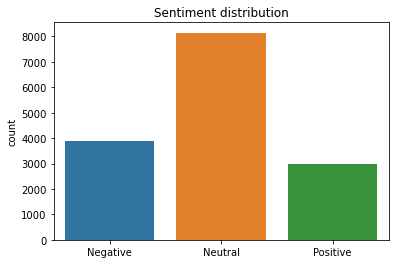

In [80]:
# Display sentimental value count.
import seaborn as sns
f = sns.countplot(x='scores', data=rev)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Neutral','Positive'])
plt.xlabel("");

We can see that the headline text mostly has neutral sentiment while less than a quarter of the headline has positive sentiment. For the negative sentiment headline, we can see that less than one third of the headlines has this characteristics. Lets create a word cloud to see which headline is more often to see in the headline news data.

<Figure size 864x576 with 0 Axes>

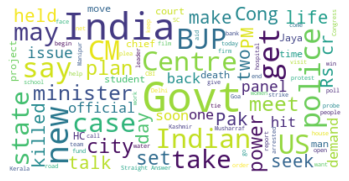

In [81]:
# Build a word cloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
text = " ".join(review for review in rev.headline)
plt.figure(figsize=(12,8))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

From the word cloud above, we can see that government and India headline news are the most often headline that contains in the headline data.

In [82]:
# Convert headline value columns to a lis
z=rev['headline'].values.tolist()
z[0:5]

['Status quo will not be disturbed at Ayodhya; says Vajpayee',
 'Fissures in Hurriyat over Pak visit',
 "America's unwanted heading for India?",
 'For bigwigs; it is destination Goa',
 'Extra buses to clear tourist traffic']

Lets define our stopwords and tokenizer.

In [83]:
# Define stopwords and tokenizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')

In [84]:
# Define text processing functions
def process_text(z):
    tokens = []
    for line in z:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

Then, we will display the positive, negative, and neutral headlines respectively.

In [85]:
# Display positive headlines
pos_lines = list(rev[rev.scores == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('govt', 125),
 ('straight', 94),
 ('answers', 86),
 ('india', 84),
 ('relief', 60),
 ('top', 59),
 ('security', 57),
 ('help', 53),
 ('rs', 49),
 ('peace', 48),
 ('best', 44),
 ('us', 44),
 ('good', 43),
 ('new', 43),
 ('support', 40),
 ('indian', 39),
 ('special', 39),
 ('cm', 38),
 ('centre', 38),
 ('party', 36)]

In [86]:
# Display negative headlines
neg_lines = list(rev[rev.scores == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('govt', 162),
 ('killed', 148),
 ('police', 99),
 ('case', 89),
 ('death', 87),
 ('india', 81),
 ('murder', 71),
 ('strike', 66),
 ('dead', 66),
 ('arrested', 61),
 ('held', 60),
 ('bjp', 58),
 ('attack', 58),
 ('accused', 56),
 ('3', 55),
 ('phoolan', 55),
 ('protest', 54),
 ('says', 53),
 ('ban', 52),
 ('fire', 48)]

In [87]:
# Display the neutral headlines
neu_lines = list(rev[rev.scores == 0].headline)

neu_tokens = process_text(neu_lines)
neu_freq = nltk.FreqDist(neu_tokens)

neu_freq.most_common(20)

[('govt', 297),
 ('india', 262),
 ('new', 194),
 ('rs', 135),
 ('police', 124),
 ('bjp', 114),
 ('may', 113),
 ('us', 109),
 ('centre', 101),
 ('meet', 100),
 ('state', 97),
 ('cm', 96),
 ('case', 93),
 ('get', 91),
 ('hc', 91),
 ('indian', 90),
 ('power', 88),
 ('cong', 86),
 ('pak', 84),
 ('chief', 84)]

From the output above, we can see that the top headlines for each categories is government headlines.